In [11]:
import nltk
import random
from nltk.classify import apply_features
from nltk.corpus import movie_reviews
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [12]:
nltk.download('movie_reviews')
nltk.download('punkt')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
# Define a function to extract features from text
def extract_features(document, word_features):
    words = set(document)
    features = {}
    for word in word_features:
        features[word] = (word in words)
    return features

In [14]:
# Prepare the positive and negative movie reviews
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

In [15]:
# Shuffle the documents to ensure randomness
random.shuffle(documents)

In [16]:
# Extract the words from movie reviews
all_words = []
for w in movie_reviews.words():
    all_words.append(w.lower())

In [17]:
# Define the feature set, which includes the most common words
all_words = nltk.FreqDist(all_words)
word_features = list(all_words.keys())[:3000]

In [22]:
# Extract features for each review
featuresets = [(extract_features(rev, word_features), category) for (rev, category) in documents]

In [25]:
# Split the data into a training and testing set
training_set = featuresets[:1500]
testing_set = featuresets[1500:]

In [26]:
# Train the Support Vector Machine (SVM) classifier
classifier = SklearnClassifier(SVC(kernel='linear'))
classifier.train(training_set)

<SklearnClassifier(SVC(kernel='linear'))>

In [27]:
# Make predictions on the test set
predictions = classifier.classify_many([features for features, _ in testing_set])
true_labels = [category for _, category in testing_set]

In [28]:
# Calculate and print accuracy
accuracy = accuracy_score(true_labels, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.778


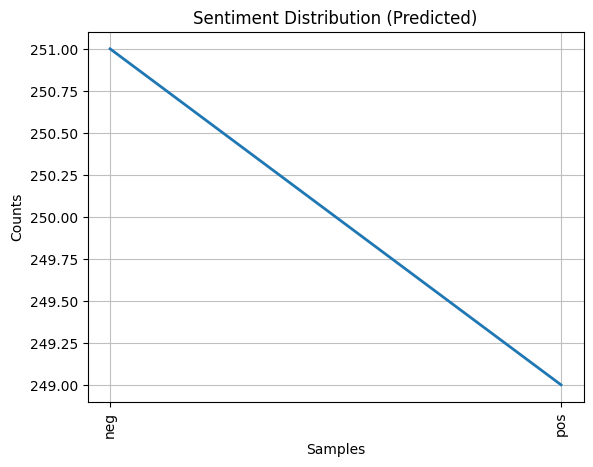

In [29]:
# Plot a bar chart showing the distribution of predicted sentiments
predicted_sentiments = [classifier.classify(features) for features, _ in testing_set]
sentiment_distribution = nltk.FreqDist(predicted_sentiments)
sentiment_distribution.plot(title="Sentiment Distribution (Predicted)")
plt.show()

In [33]:
# Allow the user to input text for sentiment prediction
user_input = input("Enter text for sentiment prediction: ")
user_features = extract_features(user_input.split(), word_features)
user_sentiment = classifier.classify(user_features)
print("Predicted Sentiment for User Input:", user_sentiment)

Enter text for sentiment prediction: that man was nice
Predicted Sentiment for User Input: pos
